## Problem 3 - Asset Pricing - Group Assignment

In [60]:
# Libraries we will need
# (same as the ones we use in Problem 1)

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib as plt
import openpyxl as opl
import statistics as st
import scipy as sp

# Read data
portfolio = pd.read_csv('../Problem1/data/25_Portfolios_5x5.csv', parse_dates= True, index_col='DATE', infer_datetime_format=True)
portfolio.index = pd.to_datetime(portfolio.index, format="%Y%m")

# Calculate average returns

inv_df = pd.read_csv('Portfolios_Formed_on_INV.csv',  index_col = "DATE")
inv_df.index = pd.to_datetime(inv_df.index, format="%Y%m")

inv_df['RM'] = np.round((inv_df['Lo 30'] + inv_df['Med 40'] + inv_df['Hi 30'])/3,4)

risk_free = pd.read_csv('../Problem1/data/RF_Data.csv', index_col = "DATE")
risk_free.index = pd.to_datetime(risk_free.index, format = "%Y%m")


# Merge together
#df = pd.merge(left = portfolio, right = inv_df, how = 'inner', on = 'DATE')
df = pd.merge(left = inv_df, right = risk_free, how = "inner", on = "DATE")


# Excess returns

df["Lo 10"] = df["Lo 10"] - df["RF"]
df["2-Dec"] = df["2-Dec"] - df["RF"]
df["3-Dec"] = df["3-Dec"] - df["RF"]
df["4-Dec"] = df["4-Dec"] - df["RF"]
df["5-Dec"] = df["5-Dec"] - df["RF"]
df["6-Dec"] = df["6-Dec"] - df["RF"]
df["7-Dec"] = df["7-Dec"] - df["RF"]
df["8-Dec"] = df["8-Dec"] - df["RF"]
df["9-Dec"] = df["9-Dec"] - df["RF"]
df["Hi 10"] = df["Hi 10"] - df["RF"]
df["RM"] = df["RM"] - df["RF"]


In [72]:
# Regression dataset

reg_df = df[["RM","Lo 10", "2-Dec", "3-Dec", "4-Dec", "5-Dec", "6-Dec", "7-Dec", "8-Dec", "9-Dec", "Hi 10"]]
reg_df
# Estimate CAPM regression for each investment decile
import statsmodels.api as sm

output_df = pd.DataFrame(columns = ["var","alpha", "beta"])

#factors = sm.add_constant(df['RM'])
#all_results = {}
#mod = sm.OLS(df[reg_df.columns[2]], factors)
#res = mod.fit(cov_type="HC0")

for i in reg_df.columns:
    if(i != 'RM'):
        factors = sm.add_constant(reg_df['RM'])
        mod = sm.OLS(reg_df[i], factors)
        res = mod.fit(cov_type="HC0")
        aux_df = {"var": [i], "alpha": [res.params['const']], "beta": [res.params['RM']]}
        aux_df = pd.DataFrame(aux_df)
        output_df = output_df.append(aux_df)

factors = sm.add_constant(reg_df['RM'])
mod = sm.OLS(reg_df[reg_df.columns[1]], factors)
print(mod.fit().summary())
print(output_df)

                            OLS Regression Results                            
Dep. Variable:                  Lo 10   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     3686.
Date:                Wed, 02 Feb 2022   Prob (F-statistic):          7.53e-280
Time:                        14:43:22   Log-Likelihood:                -1510.3
No. Observations:                 696   AIC:                             3025.
Df Residuals:                     694   BIC:                             3034.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0937      0.081      1.153      0.2

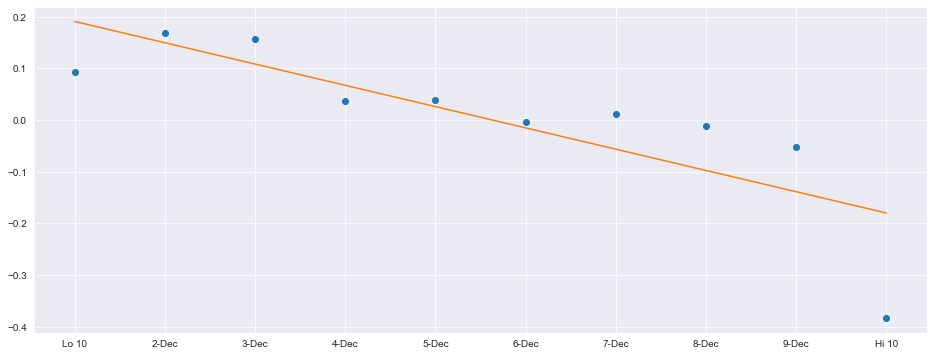

In [99]:
# Plot results
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

fig = plt.figure(figsize=(16, 6))
fig = plt.plot(output_df['var'], output_df['alpha'], 'o')
#output_df['aux_seq'] = np.linspace(1,len(output_df), len(output_df))
output_df['seq'] = np.array([1,2,3,4,5,6,7,8,9,10])
m, b = np.polyfit(np.array(output_df['seq']), np.array(output_df['alpha']), 1) # Linear regression
output_df['line'] = m*output_df['seq'] + b
fig = plt.plot(output_df['var'], output_df['line'])
